# TP 1 | Clustering de imágenes


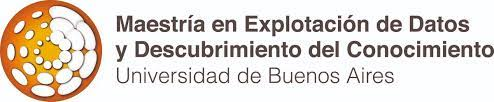

_Data mining en Ciencia y Tecnología_  
2do cuatrimestre 2023

In [1]:
try:
    np.abs(1)
    firstrun = False
except:
    firstrun= True
firstrun

True

In [2]:
if (firstrun):
    try:
        from tensorflow.keras.utils  import load_img
    except:
        ! pip install tensorflow
        from tensorflow.keras.utils  import load_img

In [3]:
if (firstrun):
    try:
        from keras.models import Model
    except:
        ! pip install keras
        from keras.models import Model

In [4]:
# for loading/processing the images
# from keras.preprocessing.image import load_img
# from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.utils  import load_img
from tensorflow.keras.utils import img_to_array

# models
from keras.applications.vgg16 import VGG16
from keras.models import Model

In [5]:
if (firstrun):
    try:
        # clustering and dimension reduction
        from sklearn.cluster import KMeans
        from sklearn.decomposition import PCA
    except:
        ! pip install sklearn
        # clustering and dimension reduction
        from sklearn.cluster import KMeans
        from sklearn.decomposition import PCA

In [6]:
# for everything else
import os
import numpy as np
import matplotlib.pyplot as plt
from random import randint
import pandas as pd
#import pickle

In [7]:
# Tensorflow model
model = VGG16()
model = Model(inputs = model.inputs, outputs = model.layers[-2].output)

553467096/553467096 [==============================] - 8s 0us/step


In [8]:
def preprocess(lista, model):
    datays = {}
    for i in lista:
      featuress = extract_features(i, model)
      datays[i] = featuress
    # lista de filenames
    filenmss = np.array(list(datays.keys()))

    # lista de features
    featsss = np.array(list(datays.values()))

    # reshape 4096 features por el número de imagens
    print(featsss.shape)
    featsss = featsss.reshape(-1,4096)
    return filenmss, featsss

In [9]:
def extract_features(file, model):
    # levanta imagen como array 224x224
    img = load_img(file, target_size=(224,224))
    # convierte img a numpy array (originalmente es 'PIL.Image.Image')
    img = np.array(img)
    # reshape para tener formato necesario para el modelo (num_of_samples, dim 1, dim 2, channels)
    reshaped_img = img.reshape(1,224,224,3)
    # prepara imagen para modelo (función de keras)
    imgx = preprocess_input(reshaped_img)
    # extrae features
    features = model.predict(imgx, use_multiprocessing=True)
    return features

In [10]:
# function that lets you view a cluster (based on identifier)
def view_cluster(gps,cluster):
    plt.figure(figsize = (25,25));
    # gets the list of filenames for a cluster
    files = gps
    # only allow up to 30 images to be shown at a time
    if len(files) > 10:
        print(f"Clipping cluster size from {len(files)} to 10")
        files = files[:9]
    # plot each image in the cluster
    for index, file in enumerate(files):
        plt.subplot(1,10,index+1);
        img = load_img(file)
        img = np.array(img)
        plt.imshow(img)
        plt.title('Cluster n:' + str(cluster))
        plt.axis('off')

## Lectura de archivos

In [11]:
if (firstrun):
    if('google.colab' in str(get_ipython() ) ):
        environment= 'google'
    else:
        import os
        if (os.environ.get('PWD')=='/kaggle/working'):
            environment= 'kaggle'
        else:
            environment= 'local'
    print(environment)

google


In [12]:
if (firstrun):
    if( environment== 'local' ):
        DIR = '/home/vbettachini/documents/universitet/FCEyN/maestríaDatos/cienciaTecnología/'
        image_path = DIR + 'Clase 1. Intro + preTP1/flower_images'
    elif( ( environment== 'google' ) ):
        from google.colab import drive
        drive.mount('/content/drive')
        DIR = "/content/drive/MyDrive/maestría/cienciaTecnología/"
        image_path = DIR + 'Clase 1. Intro + preTP1/flower_images'
    elif( ( environment== 'kaggle' ) )  :
        a= 1

Mounted at /content/drive


In [18]:
path = sorted([os.path.join(image_path, file)
for file in os.listdir(image_path )
if file.endswith('.png')])
print(len(path))
print(path[0])

210
/content/drive/MyDrive/maestría/cienciaTecnología/Clase 1. Intro + preTP1/flower_images/0001.png


In [19]:
## Levanta archivos y extrae features
names, feat = preprocess(path, model)

1/1 [==============================] - 1s 529ms/step
(210, 1, 4096)


In [20]:
# get the unique labels (from the flower_labels.csv)
df = pd.read_csv(image_path+'/flower_labels.csv')
label = df['label'].tolist()
unique_labels = list(set(label))

In [21]:
# reduce the amount of dimensions in the feature vector
pca = PCA(n_components=100, random_state=22)
pca.fit(feat)
x = pca.transform(feat)

In [22]:
print(f"Components before PCA: {feat.shape[1]}")
print(f"Components after PCA: {pca.n_components}")

Components before PCA: 4096
Components after PCA: 100


In [23]:
#kmeans = KMeans(n_clusters=len(unique_labels))
kmeans = KMeans(n_clusters=3)
kmeans.fit(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [24]:
# holds the cluster id and the images { id: [images] }
groups = {}
for file, cluster in zip(names,kmeans.labels_):
    if cluster not in groups.keys():
        groups[cluster] = []
        groups[cluster].append(file)
    else:
        groups[cluster].append(file)

Clipping cluster size from 126 to 10
Clipping cluster size from 63 to 10
Clipping cluster size from 21 to 10


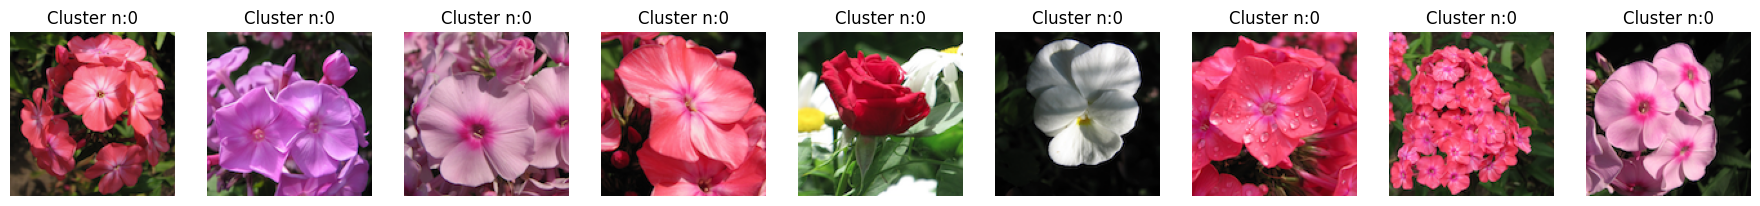

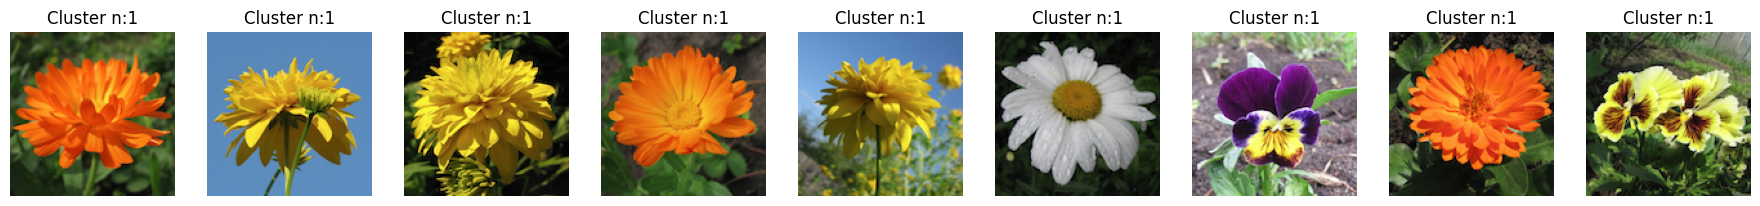

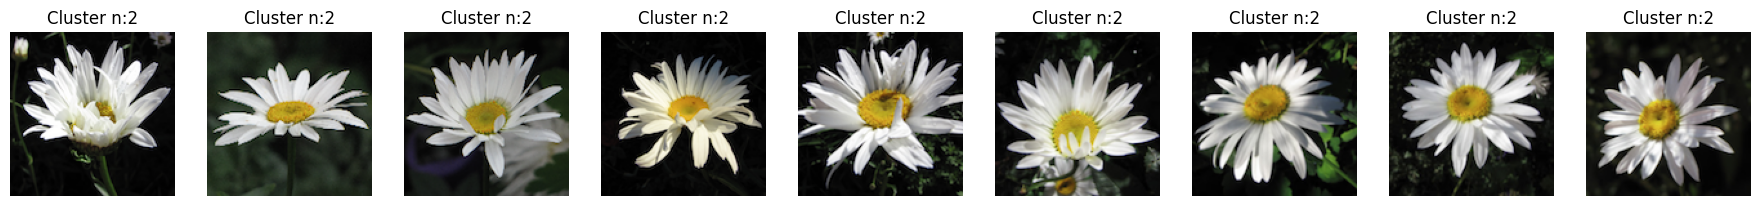

In [25]:
for n in range(len(groups)):
  view_cluster(groups[n],n)

Text(0, 0.5, 'PC4')

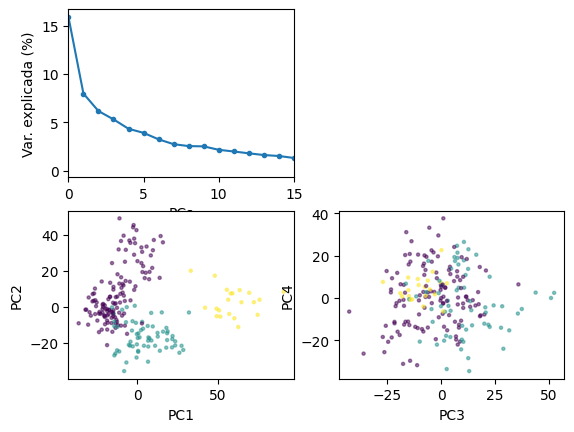

In [26]:
fig, axs = plt.subplots(2,2)
axs[0,0].plot(100* pca.explained_variance_ / sum(pca.explained_variance_),'.-')
axs[0,0].set_xlim([0,15])
axs[0,0].set_xlabel('PCs')
axs[0,0].set_ylabel('Var. explicada (%)')
axs[0,1].axis('off')

axs[1,0].scatter(x[:,0],x[:,1],s=5,c=kmeans.labels_, alpha=0.5)
axs[1,0].set_xlabel('PC1')
axs[1,0].set_ylabel('PC2')
axs[1,1].scatter(x[:,2],x[:,3],s=5,c=kmeans.labels_, alpha=0.5)
axs[1,1].set_xlabel('PC3')
axs[1,1].set_ylabel('PC4')